In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
E = np.logspace(-9, 1, 1001)
phi0 = 3e14
k = 8.52e-5
T = 573
u = 5e4
l = 0.155

[0.001, 10000000.0, 1e-07, 0.0078065018456457604]

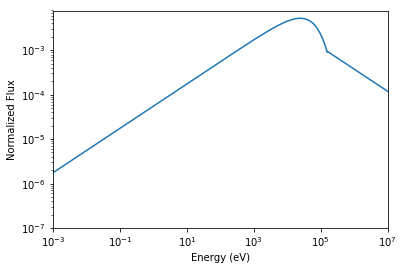

In [3]:
epi = phi0/((2*E)**0.5)
epi[E<l] = 0.0
epi[E>u] = 0.0
phi = epi
#epi /= epi.sum()
#plt.loglog(E, epi)
therm = phi0* 2*np.pi*np.sqrt(E) * np.exp(-E/(k*T)) / (np.pi * k * T)**1.5
therm[E>l] = 0.0
phi += therm
#therm /= therm.sum()
#plt.loglog(E, therm)
fast = phi0 * 0.453 * np.exp(-1.036 * E / 1e6) * np.sinh(np.sqrt(2.29 * E / 1e6))
phi += fast
fast[np.isnan(fast)] = 0.0
fast[E<u] = 0.0
#fast /= fast.sum()
#plt.loglog(E, fast)
E = np.logspace(-3, 7, 1001)
phi /= phi.sum()
plt.loglog(E, phi)
ax = plt.axis()
plt.xlabel('Energy (eV)')
plt.ylabel('Normalized Flux')
plt.axis([E[0], E[-1], 1e-7, ax[3]])

In [4]:
def thermspect(E, T=573, lower=0.13e-6):
    k = 8.52e-5
    phi = np.empty(len(E), 'f8')
    mask = (E <= lower)
    phi[mask] = 2*np.pi*np.sqrt(E[mask]*1e6) * np.exp(-E[mask]*1e6/(k*T)) / (np.pi * k * T)**1.5
    mask = (E > lower)
    phi[mask] = 1/((E[mask]*1e6)**0.5)
    phi[mask] += 0.453 * np.exp(-1.036 * E[mask]) * np.sinh(np.sqrt(2.29 * E[mask]))
    return phi

[1.0000000000000001e-09, 10.0, 1e-07, 0.0088403931624787546]

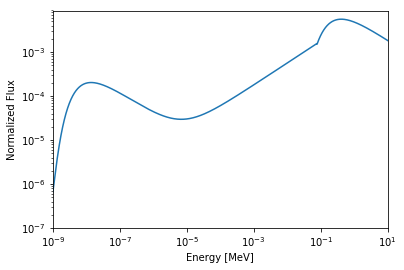

In [9]:
E = np.logspace(-9, 1, 1001)
Et = E[::-1]
spec = thermspect(Et)
spec /= spec.sum()
plt.loglog(E, spec)
ax = plt.axis()
plt.xlabel('Energy [MeV]')
plt.ylabel('Normalized Flux')
plt.axis([E[0], E[-1], 1e-7, ax[3]])

In [67]:
5e4 * 1e-6

0.049999999999999996